### Video Game Sales Prediction Model 

Analyzing sales data for over 16,500 games is a very popular problem statement on Kaggle. 
* We can either solve this problem to find numerous patterns and relationships between factors affecting video game sales, or 
* We can use this dataset to predict future video game sales. 

In the file, we are going to train a machine learning model for predicting video game sales.

The dataset we aree using contains a list of video games and their sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Now let’s see if this dataset contains null values:

In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
data = data.dropna()

Before we train the model, let’s take a look at the top 10 best-selling game categories:

In [6]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)

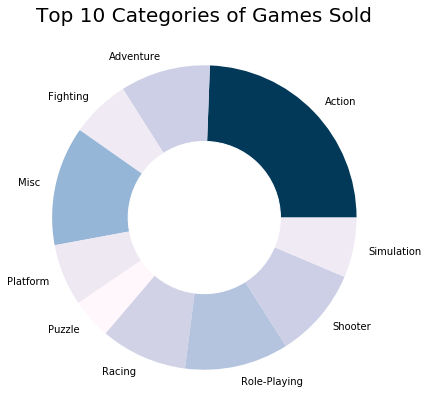

In [7]:
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

Let’s have a look at the correlation between the features of this dataset:

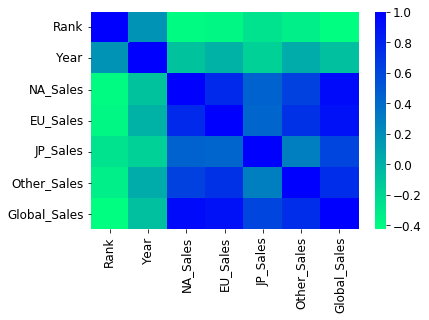

In [8]:
data.corr()
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

### Training Video Game Sales Prediction Model

We’ll prepare the data by storing the features we need to train this model in the `x` variable and storing the target column in the `y` variable:

In [9]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

Now let’s split the data and use the linear regression algorithm to train this model:

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)